In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None) # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full width of column content

# Load data
df = pd.read_csv("../data/raw/house_data.csv")

# Preview
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
df.shape


(4600, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.columns = df.columns.str.lower()
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.isnull().sum() 


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])


In [8]:
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month

df.drop(columns=['date'], inplace=True)


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5


In [11]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower, upper = detect_outliers_iqr(df['price'])

outliers = df[(df['price'] < lower) | (df['price'] > upper)]
outliers.shape


(240, 19)

In [12]:
outliers
#Extreme prices may represent luxury properties, which are valid business cases. Therefore, outliers were retained for modeling but analyzed separately.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
11,1.400000e+06,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA,2014,5
14,1.200000e+06,5.0,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA,2014,5
99,1.395000e+06,5.0,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,3930 NE Belvoir Pl,Seattle,WA 98105,USA,2014,5
122,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2.199900e+06,4.0,1.50,1120,5427,1.0,0,0,3,1120,0,1969,2014,19009-19021 SE 266th St,Covington,WA 98042,USA,2014,5
4350,2.659000e+07,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA,2014,7
4465,2.560498e+06,3.0,2.50,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA,2014,6
4467,1.337044e+06,4.0,3.50,4280,9583,2.0,0,0,3,4280,0,2005,0,1415 108th Ave SE,Bellevue,WA 98004,USA,2014,6


In [13]:
binary_cols = ['waterfront']

for col in binary_cols:
    df[col] = df[col].astype('int')


In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sale_year,sale_month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7


In [15]:
df.to_csv("../data/processed/clean_house_data.csv", index=False)


We started by understanding the dataset structure, verified data quality, engineered time-based features from the sale date, 
and analyzed outliers from a business perspective rather than removing them blindly.”

and save the clean code to another csv , (for agail perpure saprarte the tasks to keep focus)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/clean_house_data.csv")

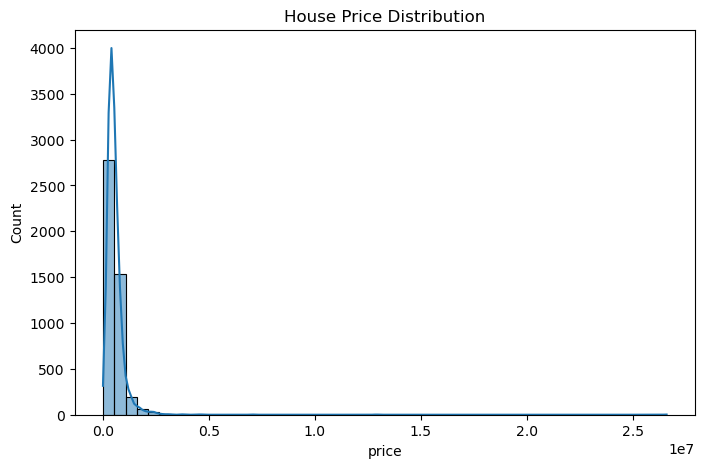

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()


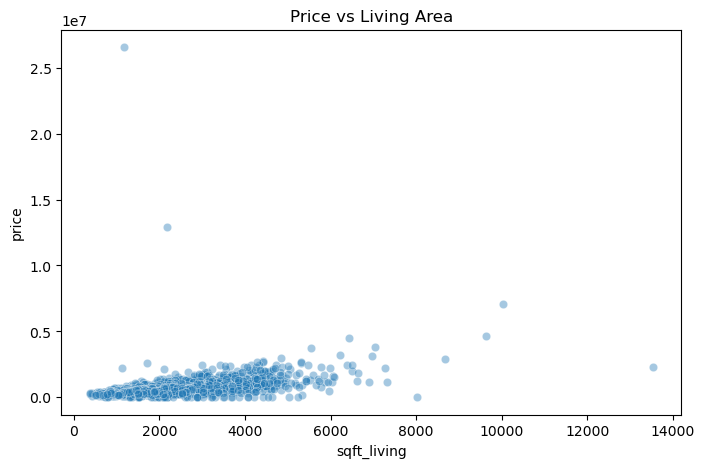

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.4)
plt.title("Price vs Living Area")
plt.show()


In [19]:
df.groupby('waterfront')['price'].mean()


waterfront
0    5.454623e+05
1    1.451621e+06
Name: price, dtype: float64

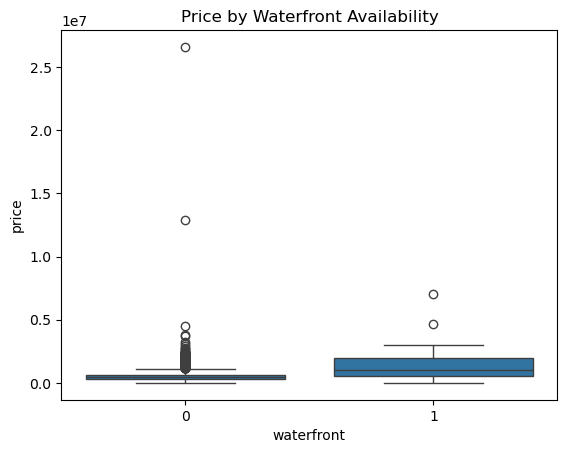

In [20]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Price by Waterfront Availability")
plt.show()


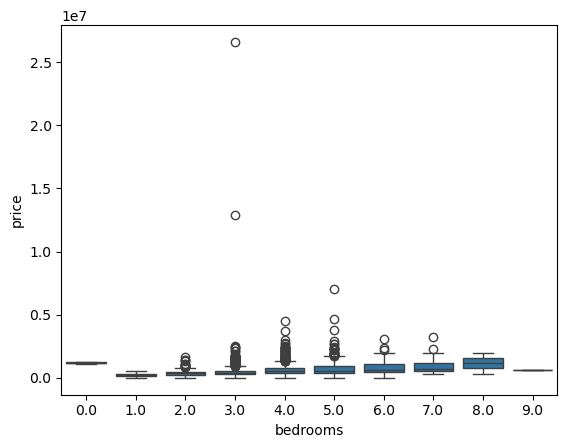

In [21]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.show()


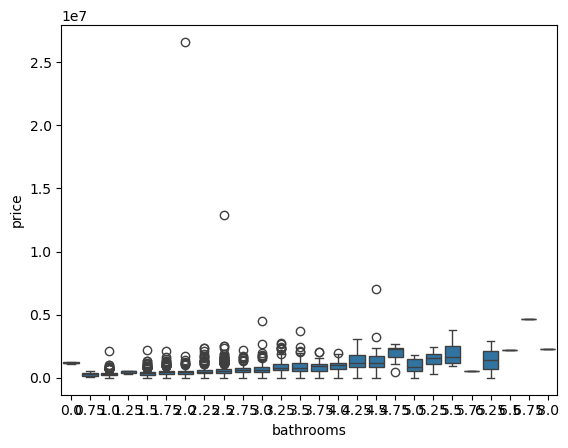

In [22]:
sns.boxplot(x='bathrooms', y='price', data=df)
plt.show()


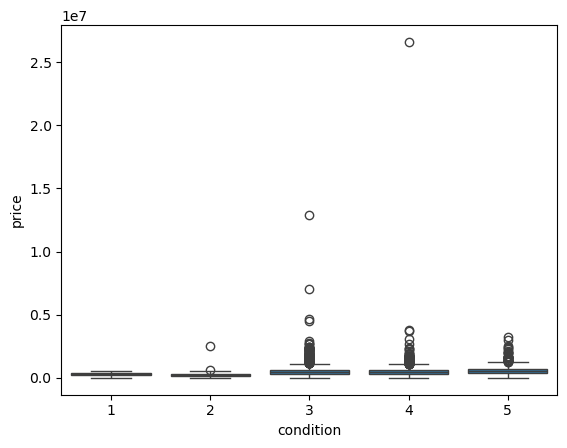

In [23]:
sns.boxplot(x='condition', y='price', data=df)
plt.show()


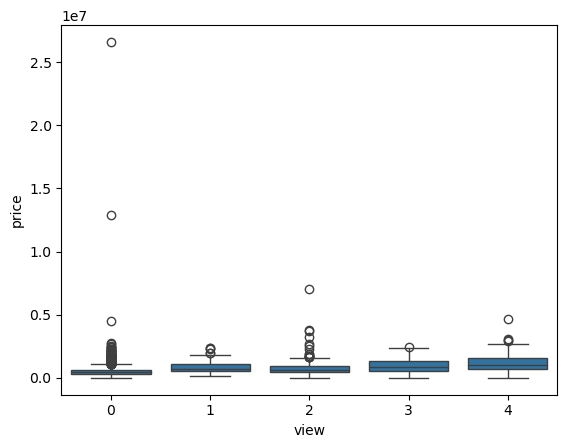

In [24]:
sns.boxplot(x='view', y='price', data=df)
plt.show()


In [25]:
top_cities = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
top_cities


city
Medina                2.046559e+06
Clyde Hill            1.321945e+06
Yarrow Point          1.194838e+06
Mercer Island         1.123818e+06
Bellevue              8.471807e+05
Beaux Arts Village    7.450000e+05
Fall City             6.926818e+05
Sammamish             6.869176e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64

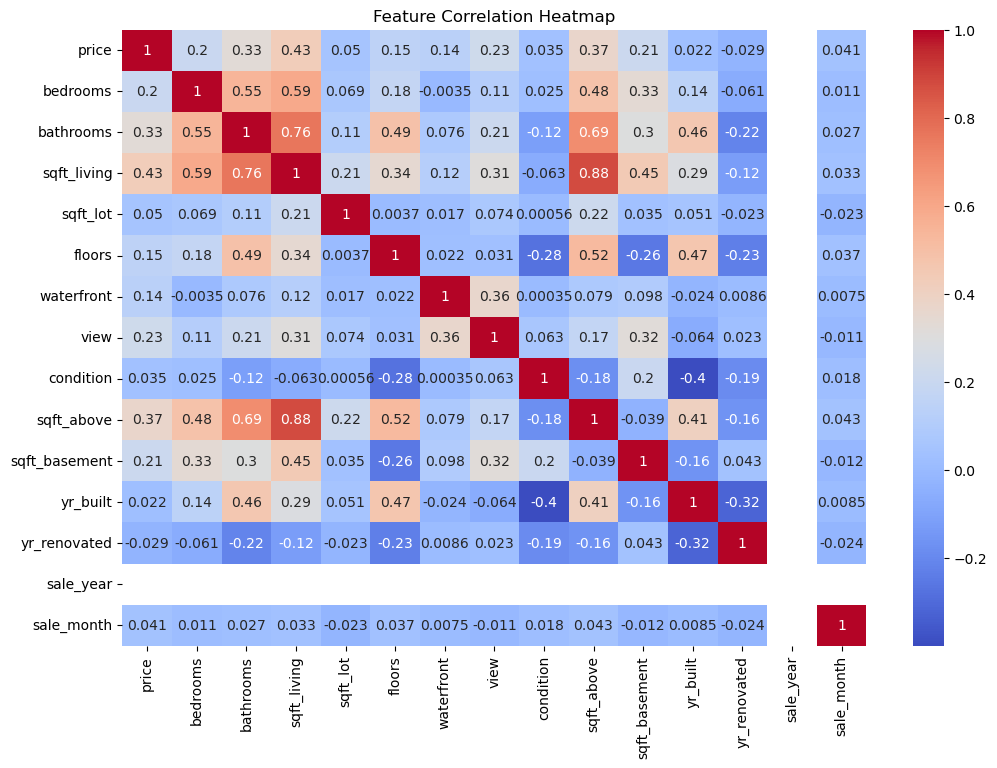

In [26]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/clean_house_data.csv")


In [28]:
cluster_features = [
    'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront',
    'view', 'condition'
]

X = df[cluster_features]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


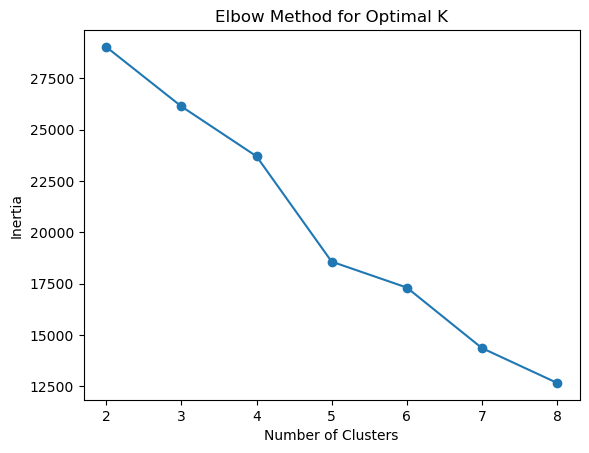

In [30]:
inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,9), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [32]:
df['cluster'].value_counts()


cluster
2    1916
1    1368
3    1241
0      75
Name: count, dtype: int64

In [33]:
cluster_summary = df.groupby('cluster')[cluster_features + ['price']].mean()
cluster_summary


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,price
cluster,,,,,,,,,
0,3.680000,2.676667,3283.466667,238852.760000,1.680000,0.000000,0.560000,3.320000,700929.395556
1,3.231725,1.802266,1783.489766,11197.024123,1.160819,0.004386,0.183480,4.285819,487916.306261
2,3.871608,2.755611,2771.065762,12180.995303,1.944415,0.013570,0.374739,3.168058,691333.301800
3,2.843674,1.606567,1487.155520,9469.219178,1.221595,0.000806,0.077357,2.978243,398385.116113


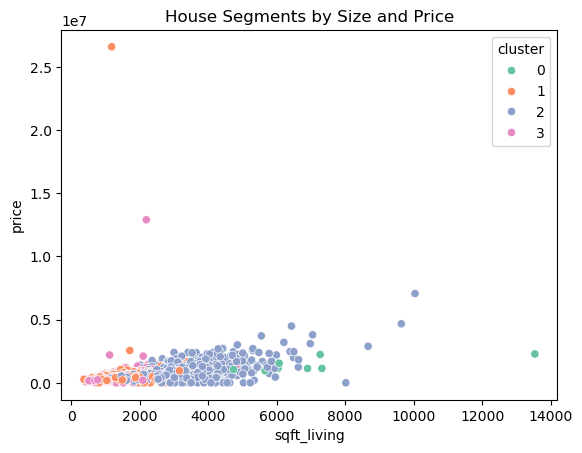

In [34]:
sns.scatterplot(
    x='sqft_living',
    y='price',
    hue='cluster',
    data=df,
    palette='Set2'
)
plt.title("House Segments by Size and Price")
plt.show()


In [35]:
df.to_csv("../data/processed/clustered_house_data.csv", index=False)


In [36]:
import pandas as pd

df = pd.read_csv("../data/processed/clustered_house_data.csv")


In [37]:
df = df.drop(columns=['street', 'country'])


In [38]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df['city_encoded'] = le_city.fit_transform(df['city'])

# Optional: encode statezip too
le_state = LabelEncoder()
df['statezip_encoded'] = le_state.fit_transform(df['statezip'])

# Drop original categorical columns
df = df.drop(columns=['city', 'statezip'])


In [39]:
df[['city_encoded', 'statezip_encoded']].head()


,city_encoded,statezip_encoded
0,36,62
1,35,58
2,18,26
3,3,7
4,31,31


In [40]:

X = df.drop(columns=['cluster', 'price'])
y = df['cluster']



In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9706521739130435
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.96      0.98      0.97       274
           2       0.98      0.97      0.97       383
           3       0.98      0.98      0.98       248

    accuracy                           0.97       920
   macro avg       0.98      0.93      0.95       920
weighted avg       0.97      0.97      0.97       920



In [43]:
import joblib

joblib.dump(model, "../models/cluster_classifier.pkl")
joblib.dump(le_city, "../models/city_label_encoder.pkl")
joblib.dump(le_state, "../models/statezip_label_encoder.pkl")


['../models/statezip_label_encoder.pkl']

Linear Regression MAE: 207692.75968791783
Linear Regression RMSE: 992723.2404236543
Random Forest MAE: 165090.6846302885
Random Forest RMSE: 987439.9586052157


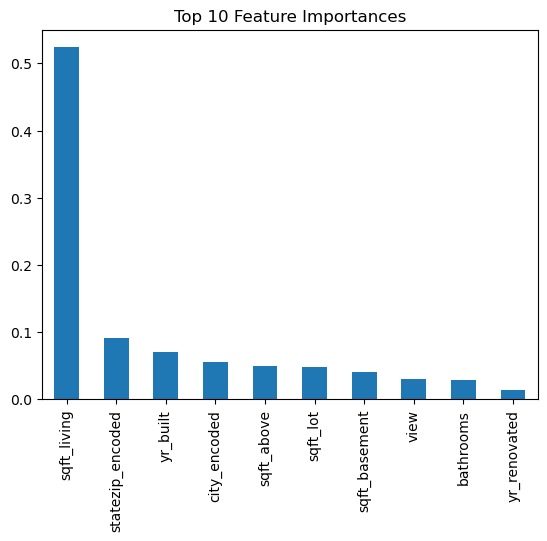

['../models/regression_features.pkl']

In [44]:
import pandas as pd

df = pd.read_csv("../data/processed/clustered_house_data.csv")

df = df.drop(columns=['street', 'country'])

from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_state = LabelEncoder()

df['city_encoded'] = le_city.fit_transform(df['city'])
df['statezip_encoded'] = le_state.fit_transform(df['statezip'])

df = df.drop(columns=['city', 'statezip'])

X = df.drop(columns=['price', 'cluster'])
y = df['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

results

import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()

import joblib

joblib.dump(rf, "../models/price_regression_model.pkl")
joblib.dump(le_city, "../models/city_label_encoder.pkl")
joblib.dump(le_state, "../models/statezip_label_encoder.pkl")

joblib.dump(rf, "../models/price_regression_model.pkl")
joblib.dump(X.columns.tolist(), "../models/regression_features.pkl")

In [45]:
{
  "city": "Seattle",
  "sqft_living": 2200,
  "bedrooms": 3,
  "bathrooms": 2.5,
  "waterfront": 0,
  "predicted_price": 650000,
  "average_city_price": 580000
}

def build_prompt(features, predicted_price, avg_price):
    prompt = f"""
You are a real estate market expert.

A machine learning model predicted a house price.

House details:
- City: {features['city']}
- Living area: {features['sqft_living']} sqft
- Bedrooms: {features['bedrooms']}
- Bathrooms: {features['bathrooms']}
- Waterfront: {features['waterfront']}
- Condition: {features['condition']}

Predicted price: ${predicted_price:,.0f}
Average market price in this city: ${avg_price:,.0f}

Explain:
1. Why this price was predicted.
2. Whether the price is realistic compared to the market.
3. What features contributed most.
"""
    return prompt

def interpret_prediction(llm_client, prompt):
    response = llm_client.generate(prompt)
    return response

sample_house = {
    "city": "Seattle",
    "sqft_living": 2200,
    "bedrooms": 3,
    "bathrooms": 2.5,
    "waterfront": 0,
    "condition": 4
}

predicted_price = 650000
avg_city_price = 580000

prompt = build_prompt(sample_house, predicted_price, avg_city_price)

print(prompt)

feature_names = joblib.load("../models/regression_features.pkl")



You are a real estate market expert.

A machine learning model predicted a house price.

House details:
- City: Seattle
- Living area: 2200 sqft
- Bedrooms: 3
- Bathrooms: 2.5
- Waterfront: 0
- Condition: 4

Predicted price: $650,000
Average market price in this city: $580,000

Explain:
1. Why this price was predicted.
2. Whether the price is realistic compared to the market.
3. What features contributed most.

